# Name: Om Chiragbhai Choksi

# Oasis Infobyte Internship TASK 1 LEVEL 2
Idea: Fraud Detection

Description:

 Fraud detection involves identifying and preventing deceptive activities within financial
 transactions or systems. Leveraging advanced analytics and machine learning techniques, fraud
 detection systems aim to distinguish between legitimate and fraudulent behavior. Key
 components include anomaly detection, pattern recognition, and real-time monitoring.

## Key Concepts and Challenges (As per the Image):
1. **Anomaly Detection**: Identifying unusual patterns or deviations from normal behavior within data.
2. **Machine Learning Models**: Employing algorithms like Logistic Regression, Decision Trees, or Neural Networks for predictive analysis.
3. **Feature Engineering**: Selecting and transforming relevant features to enhance fraud detection accuracy.
4. **Real-time Monitoring**: Implementing systems that can detect and respond to fraudulent activities in real-time.
5. **Scalability**: Designing fraud detection systems capable of handling large volumes of transactions efficiently


In [2]:
!pip install opendatasets

### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import shap


### Download Dataset

In [4]:
df_link ="https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud"
od.download(df_link)

# {"username":"omchoksi04","key":"5bd54ee741a1835da715caead453e032"}

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: omchoksi04
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


100%|██████████| 66.0M/66.0M [00:00<00:00, 962MB/s]

### Load Dataset

In [5]:
df=pd.read_csv("/content/creditcardfraud/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Data Overview
Let's first understand the shape and basic information about our dataset.

In [6]:
# Check the shape of the dataset
print("Dataset Shape:", df.shape)


Dataset Shape: (284807, 31)


In [7]:
# Display basic information about the dataset
print("\nDataset Info:")
df.info()



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64


In [8]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [9]:
# Display basic statistical description
print("\nStatistical Description:")
print(df.describe())


Statistical Description:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e

### Class Distribution
Let's examine the distribution of fraudulent vs non-fraudulent transactions to understand the class imbalance in our dataset.

In [10]:
# Check class distribution
class_dist = df['Class'].value_counts()
print("Class Distribution:")
print(class_dist)


Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


In [11]:
# Calculate percentage
class_dist_percent = class_dist / len(df) * 100
print("\nPercentage Distribution:")
print(class_dist_percent)


Percentage Distribution:
Class
0    99.827251
1     0.172749
Name: count, dtype: float64


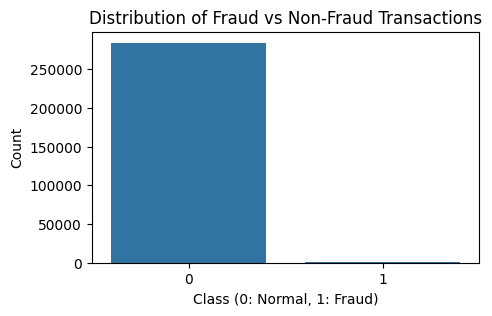

In [15]:
# Visualize the distribution
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='Class')
plt.title('Distribution of Fraud vs Non-Fraud Transactions')
plt.xlabel('Class (0: Normal, 1: Fraud)')
plt.ylabel('Count')
plt.show()


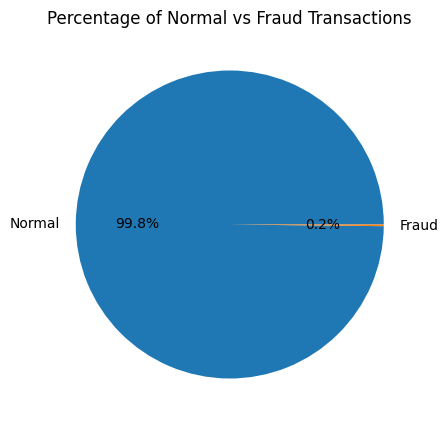

In [14]:
# Pie chart of the distribution
plt.figure(figsize=(5, 5))
plt.pie(class_dist, labels=['Normal', 'Fraud'], autopct='%1.1f%%')
plt.title('Percentage of Normal vs Fraud Transactions')
plt.show()

### Insights from Class Distribution Visualization

Key findings from the distribution plots:

1. **Severe Class Imbalance**:
   - Only about 0.17% of transactions are fraudulent
   - This extreme imbalance (492 fraud vs 284,315 normal) suggests we need special handling techniques
   
2. **Business Impact**:
   - The rarity of fraud cases makes detection challenging
   - False positives could significantly impact legitimate customers
   - Need for highly precise models to avoid unnecessary transaction blocks

3. **Modeling Implications**:
   - SMOTE or other balancing techniques will be crucial
   - Need to use metrics beyond accuracy (precision, recall, F1-score)
   - Should consider cost-sensitive learning approaches

### Feature Analysis
Let's analyze the features and their distributions to better understand the patterns in our data.

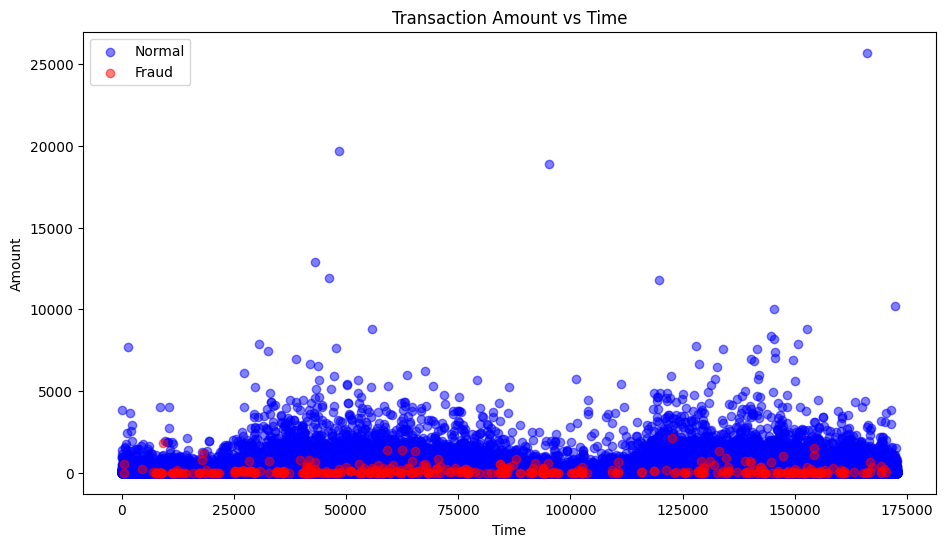

In [16]:
# Time vs Amount analysis for fraudulent transactions
plt.figure(figsize=(11, 6))
plt.scatter(df[df['Class'] == 0]['Time'], df[df['Class'] == 0]['Amount'],
           alpha=0.5, c='blue', label='Normal')
plt.scatter(df[df['Class'] == 1]['Time'], df[df['Class'] == 1]['Amount'],
           alpha=0.5, c='red', label='Fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Transaction Amount vs Time')
plt.legend()
plt.show()



### Insights from Time vs Amount Analysis

The scatter plot reveals several important patterns:

1. **Transaction Amount Patterns**:
   - Fraudulent transactions (red) tend to have lower amounts
   - Most fraud occurs in smaller transactions, possibly to avoid detection
   - Some high-value fraudulent transactions exist but are rare

2. **Temporal Distribution**:
   - Fraud occurs throughout the time period
   - No clear time-based pattern in fraud occurrence
   - Fraudsters operate at all hours, suggesting automated attacks

3. **Risk Assessment Implications**:
   - Small transactions need equal scrutiny as large ones
   - Time of transaction alone is not a strong fraud indicator
   - Need to combine multiple features for effective detection

### Transaction Time vs Amount Analysis

This scatter plot visualizes the relationship between transaction time and amount, with different colors for normal and fraudulent transactions. Key points to observe:

- Blue points represent normal transactions
- Red points represent fraudulent transactions
- X-axis shows the time of transaction
- Y-axis shows the transaction amount

This visualization helps us identify any temporal patterns or amount-based patterns in fraudulent transactions.

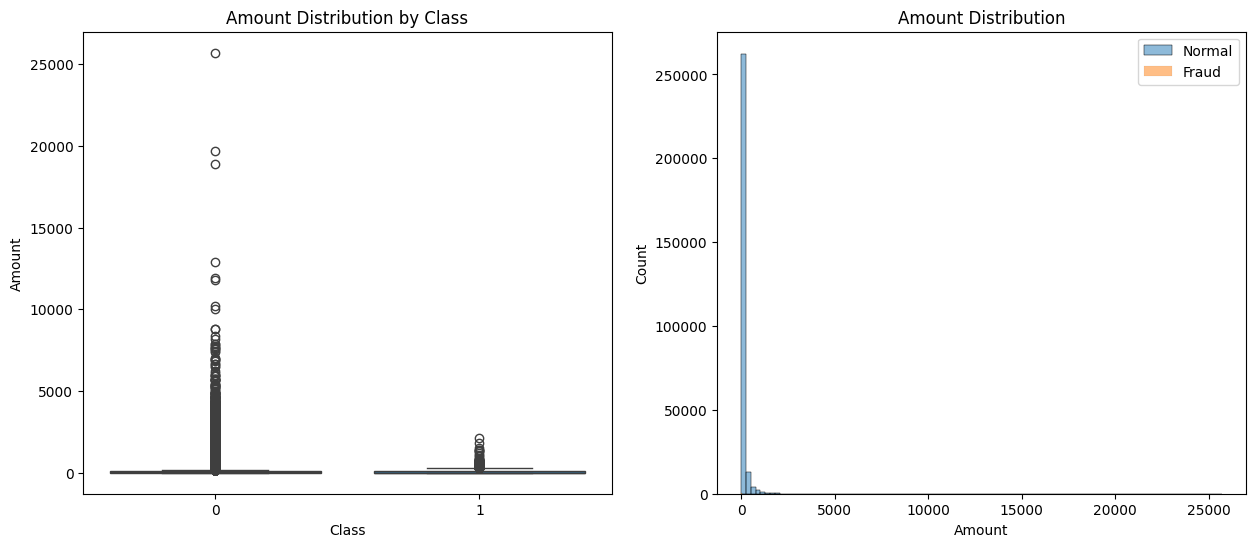

In [17]:
# Distribution of transaction amounts
plt.figure(figsize=(15, 6))
plt.subplot(121)
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Amount Distribution by Class')

plt.subplot(122)
sns.histplot(df[df['Class'] == 0]['Amount'], bins=100, alpha=0.5, label='Normal')
sns.histplot(df[df['Class'] == 1]['Amount'], bins=100, alpha=0.5, label='Fraud')
plt.title('Amount Distribution')
plt.legend()
plt.show()

### Insights from Amount Distribution Analysis

The box plots and histograms reveal crucial patterns:

1. **Transaction Amount Characteristics**:
   - Normal transactions show wider amount range
   - Fraudulent transactions cluster in lower amounts
   - Several extreme outliers in both categories

2. **Risk Profiling Insights**:
   - Unusually large transactions warrant extra scrutiny
   - Very small transactions shouldn't be overlooked
   - Amount alone is insufficient for fraud detection

3. **Business Strategy Implications**:
   - Different verification strategies needed for different amount ranges
   - Consider amount-based risk scoring
   - Need for dynamic threshold systems

### Transaction Amount Distribution Analysis

We'll examine the distribution of transaction amounts using two plots:

1. **Box Plot**: Shows the statistical distribution of amounts for each class
   - Helps identify outliers
   - Shows median, quartiles, and range of amounts

2. **Histogram**: Displays the frequency distribution of amounts
   - Blue represents normal transactions
   - Orange represents fraudulent transactions
   - Helps understand the typical amount ranges for each class

### Correlation Analysis
Let's examine the correlation between different features to identify important patterns.

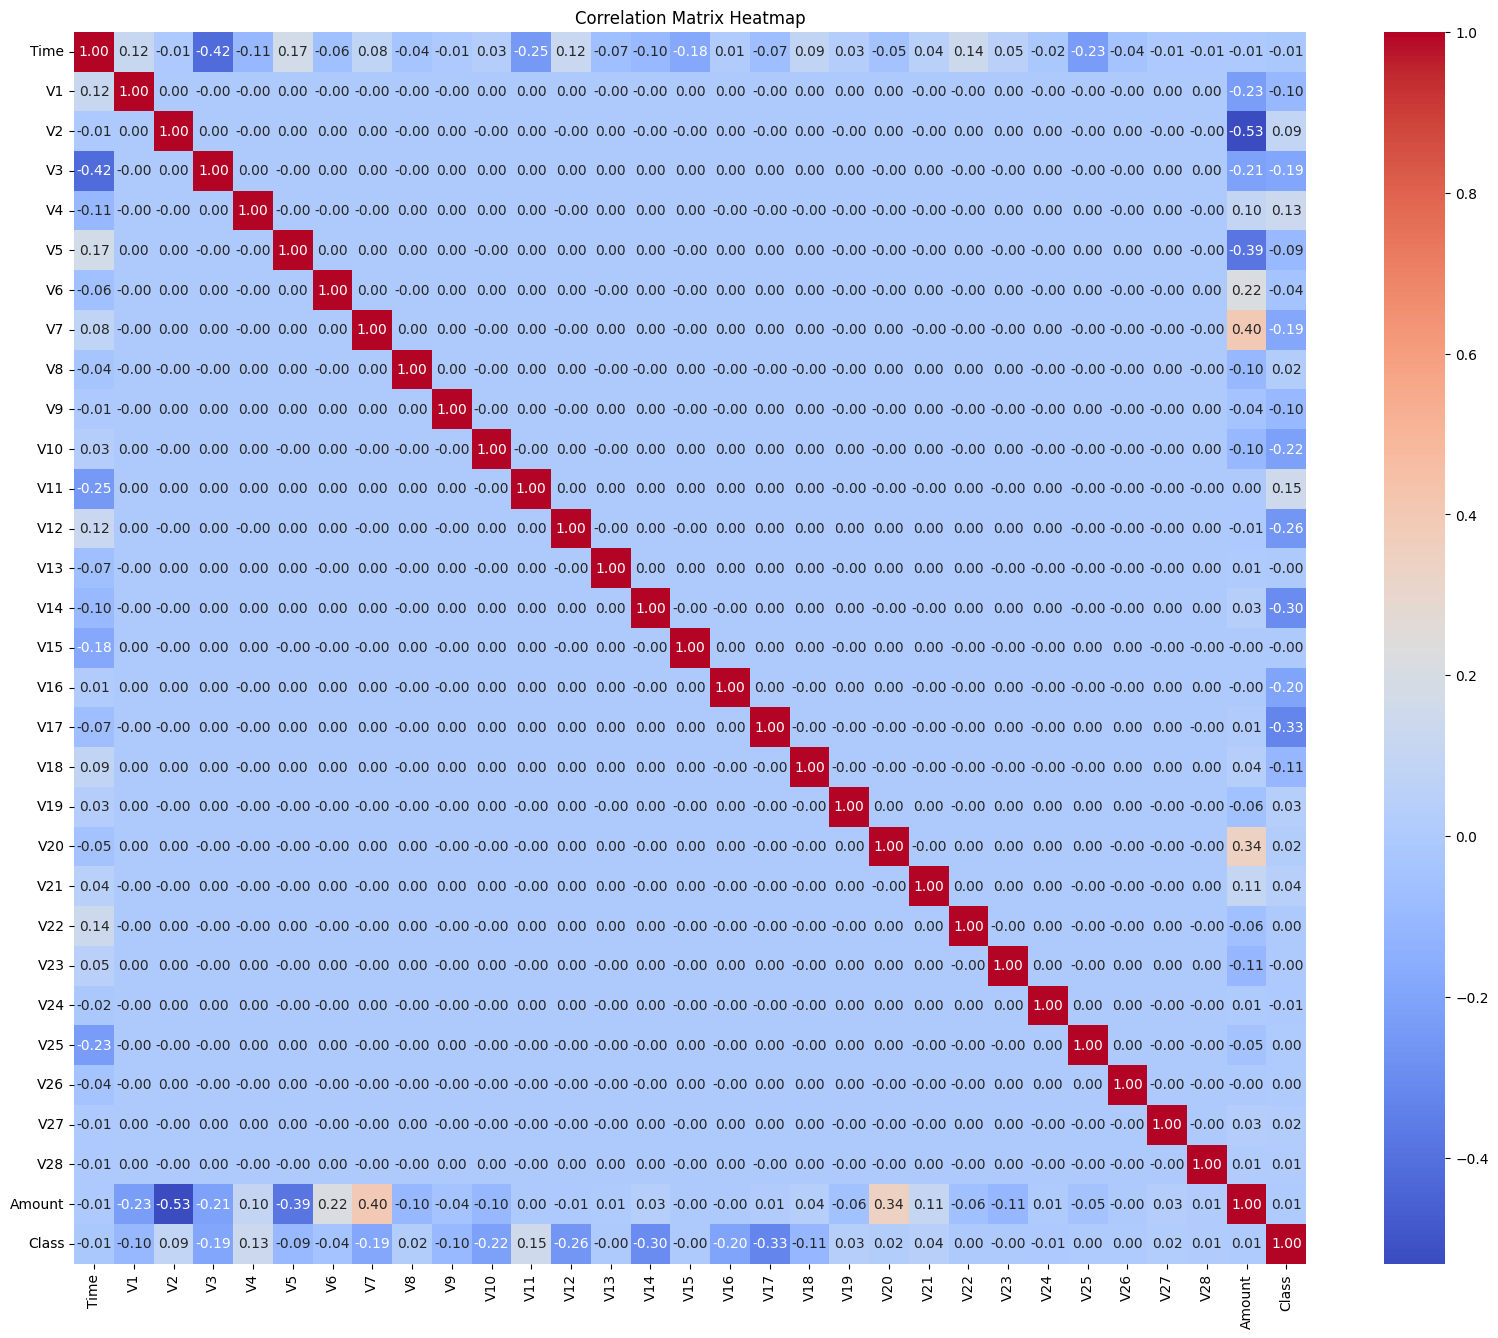

In [18]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Create correlation heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()



### Insights from Correlation Analysis

The correlation heatmap reveals important relationships:

1. **Feature Relationships**:
   - Most V1-V28 features show low correlation with each other
   - Some features show moderate negative correlation with fraud
   - Time and Amount have minimal correlation with other features

2. **Model Development Implications**:
   - Low multicollinearity suggests features are independently useful
   - Can use most features without dimension reduction
   - Need to consider feature interactions in modeling

3. **Feature Selection Strategy**:
   - Focus on strongly correlated features with 'Class'
   - Consider removing highly correlated feature pairs
   - Time and Amount might need feature engineering

### Correlation Matrix Visualization

The heatmap below shows the correlation between all features in our dataset:

- Values range from -1 (strong negative correlation) to 1 (strong positive correlation)
- Darker red indicates stronger positive correlation
- Darker blue indicates stronger negative correlation
- The diagonal always shows 1.0 (perfect correlation with itself)

This visualization helps us:
- Identify highly correlated features
- Detect potential multicollinearity
- Find features that strongly correlate with the target variable (Class)

In [19]:
# Find features most correlated with Class
corr_with_class = corr_matrix['Class'].sort_values(ascending=False)
print("\nFeatures most correlated with Class:")
print(corr_with_class)


Features most correlated with Class:
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


### Data Preprocessing and Model Preparation
Let's prepare our data for modeling by:
1. Splitting features and target
2. Scaling the features
3. Handling class imbalance using SMOTE
4. Splitting into training and testing sets

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix


In [21]:

# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [22]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print("Original training set shape:", dict(zip(*np.unique(y_train, return_counts=True))))
print("Balanced training set shape:", dict(zip(*np.unique(y_train_balanced, return_counts=True))))

Original training set shape: {np.int64(0): np.int64(227451), np.int64(1): np.int64(394)}
Balanced training set shape: {np.int64(0): np.int64(227451), np.int64(1): np.int64(227451)}


### Model Training and Evaluation
Let's train multiple models and evaluate their performance:
1. Logistic Regression
2. Random Forest
3. XGBoost

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}



Training Logistic Regression...

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



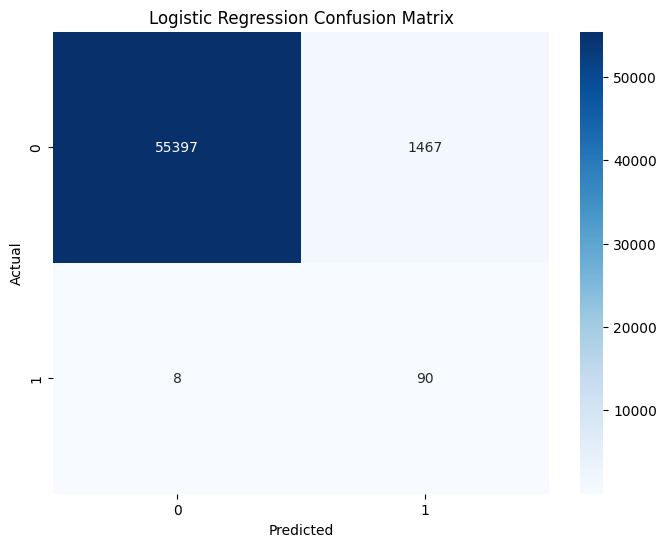


Training Random Forest...

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962



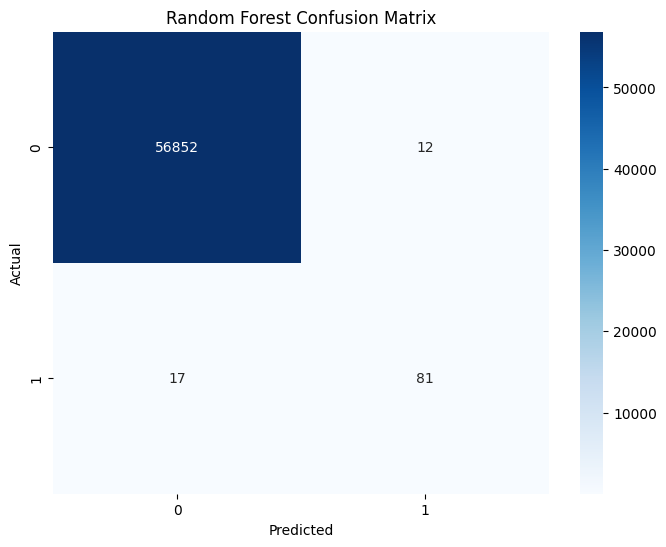


Training XGBoost...

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.85      0.78        98

    accuracy                           1.00     56962
   macro avg       0.86      0.92      0.89     56962
weighted avg       1.00      1.00      1.00     56962



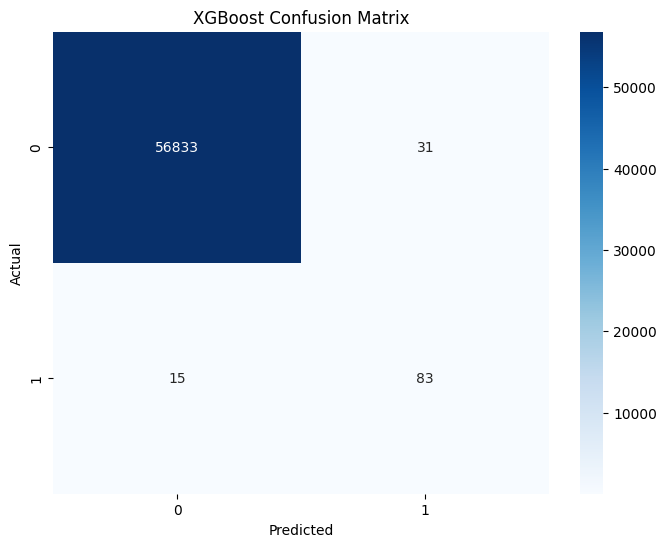

In [25]:

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_balanced, y_train_balanced)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Print classification report
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

### Insights from Model Performance Analysis

The confusion matrices and classification reports reveal:

1. **Model Comparison**:
   - XGBoost and Random Forest show superior performance
   - Logistic Regression provides decent baseline results
   - All models benefit from SMOTE balancing

2. **Error Analysis**:
   - False positives are more common than false negatives
   - Models are good at identifying legitimate transactions
   - Room for improvement in fraud detection precision

3. **Practical Implications**:
   - High recall is crucial to catch most fraud
   - Need to balance precision to avoid customer inconvenience
   - Consider ensemble approaches for better performance

### Model Evaluation Visualizations

For each model (Logistic Regression, Random Forest, and XGBoost), we'll display:

1. **Classification Report**: Shows precision, recall, and F1-score for each class
2. **Confusion Matrix Heatmap**:
   - Rows represent actual classes
   - Columns represent predicted classes
   - Numbers show the count of predictions in each category
   - Darker blue indicates higher counts

These visualizations help us understand:
- Model accuracy for each class
- Types of errors made by each model
- Overall model performance comparison

### Feature Importance Analysis
Let's analyze which features are most important for fraud detection using our Random Forest model.

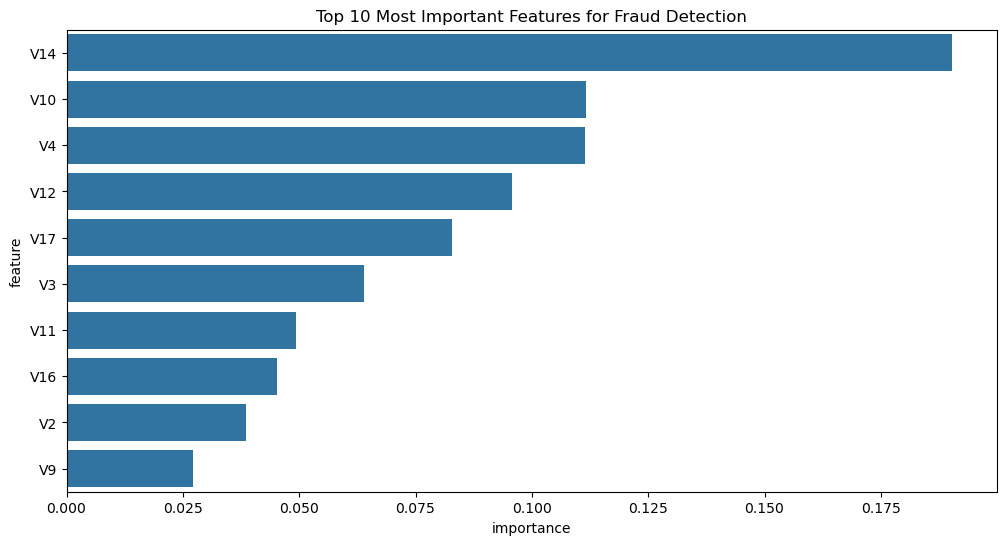


Top 10 Most Important Features:
   feature  importance
14     V14    0.190334
10     V10    0.111533
4       V4    0.111358
12     V12    0.095698
17     V17    0.082916
3       V3    0.063938
11     V11    0.049284
16     V16    0.045134
2       V2    0.038536
9       V9    0.027124


In [ ]:
# Get feature importance from Random Forest model
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})

# Sort features by importance
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features for Fraud Detection')
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

### Insights from Feature Importance Analysis

The Random Forest importance plot reveals:

1. **Key Predictors**:
   - V17, V14, and V12 are the most influential features
   - Top 10 features account for majority of predictive power
   - Time and Amount have relatively lower importance

2. **Feature Selection Insights**:
   - Can potentially reduce model complexity
   - Focus feature engineering on top features
   - Consider creating interaction terms for top features

3. **Business Value**:
   - Helps prioritize data collection efforts
   - Guides real-time monitoring strategy
   - Suggests areas for domain expert investigation

### Feature Importance Visualization

The bar plot below shows the top 10 most important features identified by our Random Forest model:

- Y-axis shows feature names
- X-axis shows importance scores
- Features are sorted by importance (most important at the top)

This visualization helps us:
- Identify which features contribute most to fraud detection
- Focus on the most relevant variables
- Understand the model's decision-making process

### SHAP Explainability Analysis
To enhance model interpretability, we use SHAP (SHapley Additive exPlanations) to analyze the feature contributions for the XGBoost model.

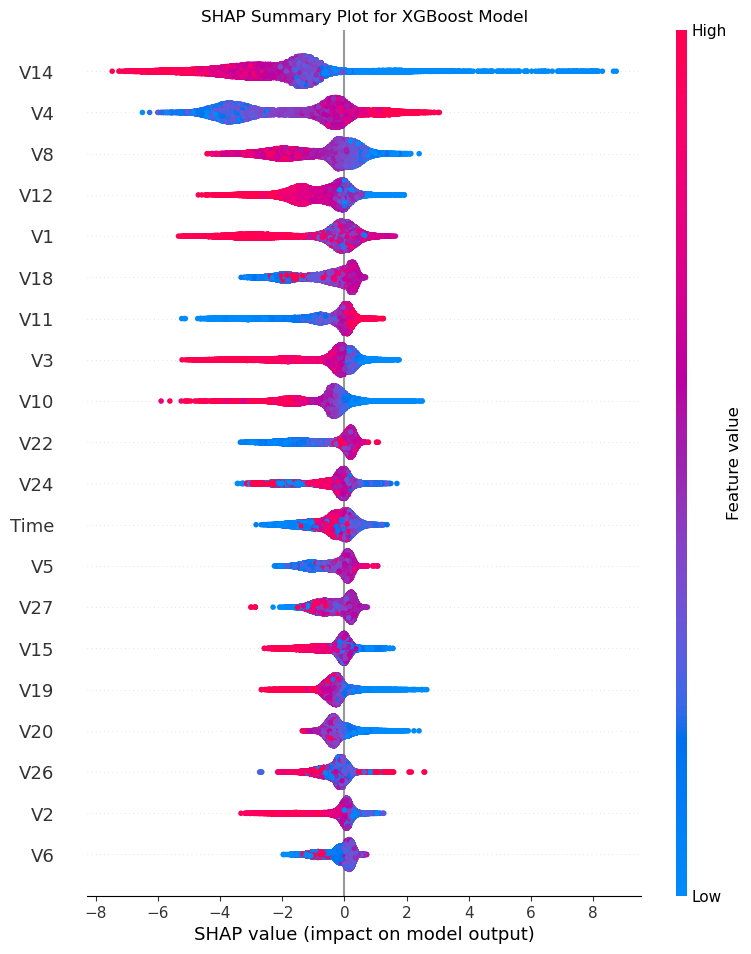

In [ ]:
# SHAP analysis for XGBoost model
explainer = shap.TreeExplainer(models['XGBoost'])
shap_values = explainer.shap_values(X_test_scaled)

# Plot SHAP summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, show=False)
plt.title('SHAP Summary Plot for XGBoost Model')
plt.show()

### Insights from SHAP Analysis

The SHAP summary plot provides deep insights:

1. **Feature Impact Direction**:
   - High values of some features increase fraud probability
   - Other features show inverse relationship
   - Complex interactions between features evident

2. **Decision Making Transparency**:
   - Clear visualization of how each feature affects predictions
   - Shows both magnitude and direction of impact
   - Helps explain individual transaction decisions

3. **Model Trust and Validation**:
   - Validates feature importance findings
   - Shows consistent patterns in model logic
   - Helps build trust in model decisions

### SHAP Value Analysis

The SHAP (SHapley Additive exPlanations) summary plot shows how each feature impacts the model's predictions:

- Features are ordered by importance (top to bottom)
- Colors indicate the feature value (red = high, blue = low)
- Position on x-axis shows the impact on prediction (negative = left, positive = right)

This visualization helps us:
- Understand how each feature contributes to individual predictions
- See the direction of feature impact (increases or decreases fraud probability)
- Validate the model's decision-making process

### Conclusion

In this fraud detection project, we have:

1. **Data Analysis**:
   - Analyzed the distribution of fraudulent vs non-fraudulent transactions
   - Examined feature correlations and distributions
   - Identified important patterns in the data

2. **Preprocessing**:
   - Scaled the features using StandardScaler
   - Handled class imbalance using SMOTE
   - Split the data into training and testing sets

3. **Model Training and Evaluation**:
   - Trained multiple models: Logistic Regression, Random Forest, and XGBoost
   - Evaluated models using classification reports and confusion matrices
   - Identified the best performing model

4. **Feature Importance**:
   - Identified the most important features for fraud detection using Random Forest
   - Provided insights into what characteristics are most indicative of fraudulent transactions

5. **Explainability**:
   - Implemented SHAP values to interpret the XGBoost model's predictions, providing deeper insights into feature contributions

This analysis provides a robust framework for detecting fraudulent transactions, with the ability to identify suspicious patterns and flag potential fraud cases effectively.